# Log prob function

In [2]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import numpy as np
import torch

c:\Users\danie\miniconda3\envs\tf\lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
class GPTContainer:
    def __init__(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = GPT2Tokenizer.from_pretrained("gpt2") # change to gpt-xl when running for real
        self.model = GPT2LMHeadModel.from_pretrained("gpt2").to(self.device) # change to gpt-xl when running for real
        
        self.starts = []
        self.suffs = []

        # Populate starts and suffs
        for i in range(len(self.tokenizer.get_vocab())):
            tok = self.tokenizer.decode(i)
            if tok[0] == " " or tok[0] == ".":
                self.starts.append(i)
            elif tok[0] != " ":
                self.suffs.append(i)
                    
    def gpt2_sent_prob(self, sent):
        logsoftmax = torch.nn.LogSoftmax(dim=-1)
        
        tokenizer = self.tokenizer
        model = self.model

        starts = self.starts
        suffs = self.suffs

        sent = ". " + sent + "."

        tokens = tokenizer.encode(sent)
        inputs = torch.tensor(tokens).to(self.device)

        with torch.no_grad():
            out = model(inputs)

        unsoft = out[0]
        lab1 = inputs.cpu().data.numpy()
        
        probs = []
        for x in range(len(lab1) - 1):

            lab = lab1[x + 1]
            unsoft1 = unsoft[x]

            if lab in starts:

                soft = logsoftmax(unsoft1[starts])
                prob = float(soft[starts.index(lab)].cpu().data.numpy())

            elif lab in suffs:

                soft = logsoftmax(unsoft1[suffs])
                prob = float(soft[suffs.index(lab)].cpu().data.numpy())

            probs.append(prob)

        prob = np.sum(probs)

        return prob


# Example usage

In [4]:
gpt = GPTContainer()

In [5]:
sentence = "A message has been sent to your account"
log_probability = gpt.gpt2_sent_prob(sentence)

-4.6575775146484375
-7.186469078063965
-4.559632301330566
-0.29256439208984375
-0.7996886372566223
-0.4892621338367462
-4.360196590423584
-3.6828489303588867
-1.3556320667266846


# Creating log probabilities

In [6]:
import pandas as pd

dfsentence = pd.read_csv("our_df.csv", usecols=['sentence_pair', 'subjects_majority_vote', 'trial_type', 'cluster'])

In [7]:
# dfsentence = df.drop_duplicates(subset='sentence_pair')
dfsentence[['sentence1', 'sentence2']] = dfsentence['sentence_pair'].str.split('_', expand=True)

In [8]:
# Calculate probabilities for each pair of sentences
probabilities = []
for index, row in dfsentence.iterrows():
    prob1 = gpt.gpt2_sent_prob(row['sentence1'])
    prob2 = gpt.gpt2_sent_prob(row['sentence2'])
    probabilities.append([prob1, prob2])

# Add probabilities to the DataFrame
dfsentence['probability_sentence1'] = [p[0] for p in probabilities]
dfsentence['probability_sentence2'] = [p[1] for p in probabilities]

-4.6575775146484375
-7.186469078063965
-4.559632301330566
-0.29256439208984375
-0.7996886372566223
-0.4892621338367462
-4.360196590423584
-3.6828489303588867
-1.3556320667266846
-5.241035461425781
-2.157698631286621
-8.424229621887207
-3.3314478397369385
-0.006614102050662041
-5.288832664489746
-12.237706184387207
-7.693717956542969
-0.6557855010032654
-4.6575775146484375
-7.186469078063965
-4.559632301330566
-0.29256439208984375
-0.7996886372566223
-0.4892621338367462
-4.360196590423584
-3.6828489303588867
-1.3556320667266846
-5.241035461425781
-2.157698631286621
-8.424229621887207
-3.3314478397369385
-0.006614102050662041
-5.288832664489746
-12.237706184387207
-7.693717956542969
-0.6557855010032654
-4.6575775146484375
-7.186469078063965
-4.559632301330566
-0.29256439208984375
-0.7996886372566223
-0.4892621338367462
-4.360196590423584
-3.6828489303588867
-1.3556320667266846
-5.241035461425781
-2.157698631286621
-8.424229621887207
-3.3314478397369385
-0.006614102050662041
-5.2888326644

In [ ]:
# Push df to csv
dfsentence.to_csv('our_sentences_probs.csv', index=False)

NameError: name 'dfsentence' is not defined

# Revisioned version

In [ ]:
class GPTContainer:
    def __init__(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = GPT2Tokenizer.from_pretrained("gpt2") # change to gpt-xl when running for real
        self.model = GPT2LMHeadModel.from_pretrained("gpt2").to(self.device) # change to gpt-xl when running for real

                    
    def gpt2_sent_prob(self, sent):
        logsoftmax = torch.nn.LogSoftmax(dim=-1)
        
        tokenizer = self.tokenizer
        model = self.model

        sent = ". " + sent + "."

        tokens = tokenizer.encode(sent)
        inputs = torch.tensor(tokens).to(self.device)

        with torch.no_grad():
            out = model(inputs)

        unsoft = out[0]
        lab1 = inputs.cpu().data.numpy()
        
        probs = []
        for x in range(1, len(lab1) - 1):

            lab = lab1[x + 1]
            unsoft1 = unsoft[x]

            soft = logsoftmax(unsoft1)
            prob = float(soft[lab].cpu().data.numpy())
            probs.append(prob)
            print(prob)

        prob = np.sum(probs)

        return prob

In [ ]:
gpt = GPTContainer()

In [ ]:
sentence = "A message has been sent to your account"
gpt.gpt2_sent_prob(sentence)

-7.239987373352051
-4.573667526245117
-0.29312723875045776
-0.800089418888092
-0.5112769603729248
-4.366835117340088
-3.6869874000549316
-1.502669334411621


-22.974640369415283

In [ ]:
import pandas as pd

dfsentence = pd.read_csv("our_df.csv", usecols=['sentence_pair', 'subjects_majority_vote', 'trial_type', 'cluster'])

In [ ]:
#dfsentence = df.drop_duplicates(subset='sentence_pair')
dfsentence[['sentence1', 'sentence2']] = dfsentence['sentence_pair'].str.split('_', expand=True)

C:\Users\danie\AppData\Local\Temp\ipykernel_24376\2646173595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsentence[['sentence1', 'sentence2']] = df['sentence_pair'].str.split('_', expand=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_24376\2646173595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsentence[['sentence1', 'sentence2']] = df['sentence_pair'].str.split('_', expand=True)


In [ ]:
# Calculate probabilities for each pair of sentences
probabilities = []
for index, row in dfsentence.iterrows():
    prob1 = gpt.gpt2_sent_prob(row['sentence1'])
    prob2 = gpt.gpt2_sent_prob(row['sentence2'])
    probabilities.append([prob1, prob2])

# Add probabilities to the DataFrame
dfsentence['probability_sentence1'] = [p[0] for p in probabilities]
dfsentence['probability_sentence2'] = [p[1] for p in probabilities]

C:\Users\danie\AppData\Local\Temp\ipykernel_24376\1079649262.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsentence['probability_sentence1'] = [p[0] for p in probabilities]
C:\Users\danie\AppData\Local\Temp\ipykernel_24376\1079649262.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsentence['probability_sentence2'] = [p[1] for p in probabilities]


In [ ]:
# Push df to csv
dfsentence.to_csv('our_sentences_probs_revised.csv', index=False)

# Calculating differences between models

In [ ]:
import pandas as pd

In [ ]:
dforiginal = pd.read_csv('our_sentences_probs.csv')
dfrevised = pd.read_csv('our_sentences_probs_revised.csv')

In [ ]:
dforiginal.columns

Index(['sentence_pair', 'subjects_majority_vote', 'sentence1', 'sentence2',
       'probability_sentence1', 'probability_sentence2'],
      dtype='object')

In [ ]:
dforiginal['selection'] = None
dfrevised['selection'] = None

# Iterate over each row in dforiginal
for index, row in dforiginal.iterrows():
    prob1_orig = row['probability_sentence1']
    prob2_orig = row['probability_sentence2']
    
    # Get the corresponding row from dfrevised
    row_revised = dfrevised.iloc[index]
    prob1_revised = row_revised['probability_sentence1']
    prob2_revised = row_revised['probability_sentence2']
    
    # Calculate the absolute differences for the original DataFrame
    diff1_orig = abs(0 - prob1_orig)
    diff2_orig = abs(0 - prob2_orig)
    
    # Calculate the absolute differences for the revised DataFrame
    diff1_revised = abs(0 - prob1_revised)
    diff2_revised = abs(0 - prob2_revised)
    
    # Compare the differences for both DataFrames
    if diff1_orig < diff2_orig:
        dforiginal.at[index, 'selection'] = 1
    else:
        dforiginal.at[index, 'selection'] = 2
    
    if diff1_revised < diff2_revised:
        dfrevised.at[index, 'selection'] = 1
    else:
        dfrevised.at[index, 'selection'] = 2

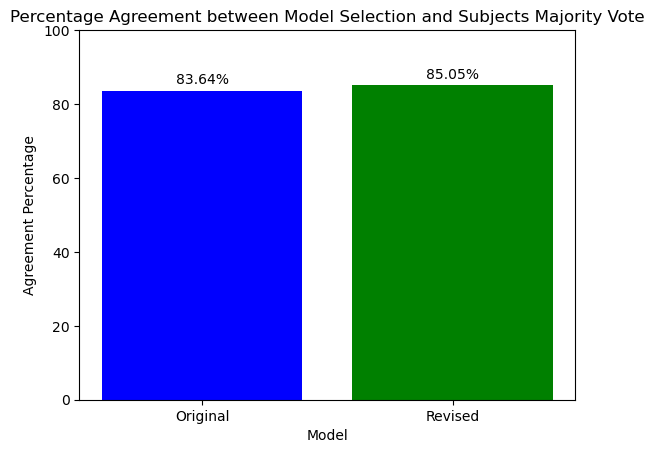

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have 'selection' and 'subjects_majority_vote' columns in your DataFrames dforiginal and dfrevised

# Compute agreement percentage for original DataFrame
original_agreement = (dforiginal['selection'] == dforiginal['subjects_majority_vote']).mean() * 100

# Compute agreement percentage for revised DataFrame
revised_agreement = (dfrevised['selection'] == dfrevised['subjects_majority_vote']).mean() * 100

# Plot the agreement percentages as a bar plot
plt.bar(['Original', 'Revised'], [original_agreement, revised_agreement], color=['blue', 'green'])
plt.title('Percentage Agreement between Model Selection and Subjects Majority Vote')
plt.xlabel('Model')
plt.ylabel('Agreement Percentage')
plt.ylim(0, 100)

for i, v in enumerate([original_agreement, revised_agreement]):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Show plot
plt.show()